### Q1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [45]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import regularizers

print(tf.__version__)

2.3.1


In [3]:
from sklearn import preprocessing

In [4]:
df = pd.read_csv('DS_hw6_p1.csv')

# preprocessing
df_x = preprocessing.scale(df.iloc[:,:-2], axis = 0)
train_x = df_x[:280, 1:]
test_x = df_x[280:, 1:]
train_y = df.iloc[:280, -2:].to_numpy()

In [6]:
train_x

array([[-1.814,  0.002,  1.512,  0.384],
       [-1.113, -0.5  , -0.135,  1.401],
       [ 0.492, -0.705,  1.832,  0.743],
       ...,
       [-0.571, -0.254,  0.175, -1.311],
       [ 0.938, -0.316,  1.022, -0.444],
       [ 0.322,  2.31 ,  0.26 , -1.002]])

In [7]:
train_x.shape

(280, 4)

In [8]:
train_y

array([[ 0.825, -1.055],
       [ 0.276, -0.415],
       [ 0.78 , -0.502],
       [ 0.32 , -0.352],
       [-0.64 ,  0.505],
       [ 0.709, -0.597],
       [ 0.141,  0.344],
       [ 0.836, -1.032],
       [ 0.154, -0.096],
       [-0.518,  0.481],
       [ 0.304, -0.047],
       [ 0.699, -0.5  ],
       [ 0.308, -0.202],
       [ 1.003, -1.052],
       [ 0.116, -0.04 ],
       [ 0.059,  0.056],
       [-0.991,  1.238],
       [ 0.102,  0.07 ],
       [ 0.48 , -0.545],
       [ 0.223, -0.336],
       [ 0.647, -0.649],
       [-0.64 ,  0.568],
       [ 0.535, -0.317],
       [-0.1  ,  0.102],
       [-0.404,  0.822],
       [ 0.178, -0.333],
       [ 0.214, -0.22 ],
       [ 0.678, -0.716],
       [ 1.213, -1.399],
       [-0.223, -0.012],
       [ 0.245, -0.586],
       [ 0.424, -0.479],
       [ 0.537, -0.302],
       [ 0.675, -0.663],
       [-0.158, -0.145],
       [ 0.466, -0.271],
       [-0.397,  0.111],
       [ 0.231, -0.64 ],
       [-0.651,  0.789],
       [ 0.951, -0.358],


In [9]:
train_y.shape

(280, 2)

In [137]:
model1 = tf.keras.Sequential([
    layers.experimental.preprocessing.Normalization(input_shape=[4,]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2)
])

In [142]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_14 (Normalizat (None, 4)                 9         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)             

In [143]:
model1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.00003),
    loss='mse')

In [144]:
history = model1.fit(
    train_x, train_y,
    epochs=500,verbose=1,
    # Calculate validation results on 10% of the training data
    validation_split = 0.2)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 0.9553 - val_loss: 1.0912
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9621 - val_loss: 1.0841
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9473 - val_loss: 1.0766
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9549 - val_loss: 1.0683
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9843 - val_loss: 1.0607
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9424 - val_loss: 1.0543
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9628 - val_loss: 1.0478
Epoch 8/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8859 - val_loss: 1.0417
Epoch 9/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9588 - val_loss: 1.0352
Epoch 10/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8989 - val_loss: 1.0285
Epoch 11/500
7/7 [==========

Epoch 167/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3288 - val_loss: 0.1552
Epoch 168/500
7/7 [==============================] - 0s 5ms/step - loss: 0.2979 - val_loss: 0.1537
Epoch 169/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2263 - val_loss: 0.1519
Epoch 170/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3535 - val_loss: 0.1522
Epoch 171/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3546 - val_loss: 0.1507
Epoch 172/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2664 - val_loss: 0.1495
Epoch 173/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3173 - val_loss: 0.1493
Epoch 174/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3462 - val_loss: 0.1503
Epoch 175/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2357 - val_loss: 0.1506
Epoch 176/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2573 - val_loss: 0.1495
Epoch 177/

Epoch 332/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1097 - val_loss: 0.1088
Epoch 333/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1272 - val_loss: 0.1074
Epoch 334/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1521 - val_loss: 0.1050
Epoch 335/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1371 - val_loss: 0.1032
Epoch 336/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1347 - val_loss: 0.1017
Epoch 337/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1556 - val_loss: 0.1004
Epoch 338/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1694 - val_loss: 0.0997
Epoch 339/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1467 - val_loss: 0.0973
Epoch 340/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1008 - val_loss: 0.0964
Epoch 341/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1099 - val_loss: 0.0971
Epoch 342/

Epoch 497/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1120 - val_loss: 0.0794
Epoch 498/500
7/7 [==============================] - 0s 5ms/step - loss: 0.0992 - val_loss: 0.0785
Epoch 499/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1220 - val_loss: 0.0791
Epoch 500/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1158 - val_loss: 0.0783


In [151]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

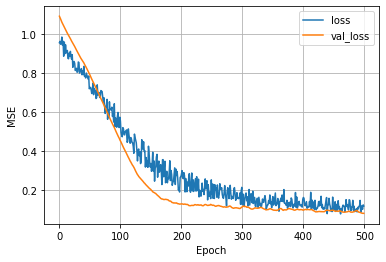

In [152]:
plot_loss(history)

In [153]:
test_y=model1.predict(test_x)

In [154]:
df_ansQ1=df[280:]

In [155]:
df_ansQ1['y1']=test_y[:,0]
df_ansQ1['y2']=test_y[:,1]

<ipython-input-155-5d62f438ef1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ansQ1['y1']=test_y[:,0]
<ipython-input-155-5d62f438ef1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ansQ1['y2']=test_y[:,1]


In [156]:
df_ansQ1

,No.,x1,x2,x3,x4,y1,y2
280,281,10.8,0.7,0.7,4.8,0.639224,-0.459265
281,282,5.4,12.0,-1.6,12.6,-0.704865,0.801001
282,283,-5.0,-12.1,21.4,-9.1,1.075400,-1.107367
283,284,-10.2,11.5,-4.3,0.8,-0.388047,0.247255
284,285,-0.9,2.1,-4.8,-2.7,0.495829,-0.550414
285,286,-1.0,-14.1,-19.2,0.5,-0.965128,0.854465
286,287,-10.3,-1.1,-5.2,6.8,0.472612,-0.609686
287,288,2.4,5.7,8.1,-6.0,0.652088,-0.643321
288,289,-25.9,-10.5,-1.5,-6.4,0.362646,-0.848616
289,290,-2.9,12.2,11.1,9.6,-0.416014,0.483523


### Results

#### 1.Any prepocessing?  
我在模型加入Normalization層，對每個欄位對標準化
#### 2.How you get the best model ? 
我反覆嘗試，並跟據validation 的loss 來找到最好的模型架構以及參數
#### 3.State all the parameters you need for training  (learning rates, epochs, weight decay, moment, etc.) 
learning rates為0.00003， epochs為500，然後我不是使用weight decay，而是使用drop out層來防止 overfitting
#### 4.Show the structure of your best model
架構如上面 model1.summary( ) 所顯示
#### 5.Write down the prediction of testing data (y1, y2)  (list in a table such as Table 1)
如上表 df_ansQ1 顯示
#### 6.Plot the learning curve (MSE) 
如上圖 plot_loss(history) 顯示